In [ ]:
import csv
import json
import pandas as pd
import numpy as np

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Cell_Phones_and_Accessories.json.gz

--2022-02-18 17:34:06--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Cell_Phones_and_Accessories.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1232323281 (1.1G) [application/octet-stream]
Saving to: ‘Cell_Phones_and_Accessories.json.gz’

Cell_Phones_and_Acc 100%[===================>]   1.15G  52.4MB/s    in 23s     

2022-02-18 17:34:29 (50.8 MB/s) - ‘Cell_Phones_and_Accessories.json.gz’ saved [1232323281/1232323281]



In [ ]:
!gunzip Cell_Phones_and_Accessories.json.gz

In [ ]:
input_file = "Cell_Phones_and_Accessories.json"
input_json = open(input_file, "r", encoding="utf-8")

output_file = "Cell_Phones_and_Accessories.csv"
with open(output_file, "w", encoding="utf-8") as output_csv:
    csv_writer = csv.writer(output_csv)
    flag = 0
    for line in input_json.readlines():
        dic = json.loads(line)
        # writing headline in the beginning
        if flag == 0:
            csv_writer.writerow(dic)
            flag = 1
        csv_writer.writerow(dic.values())

print("Done")

Done


In [ ]:
for chunk in pd.read_csv('Cell_Phones_and_Accessories.csv',on_bad_lines='skip',chunksize=1000000):
  print(chunk.shape)
  print("-"*90)
  print(chunk.head(2))
  print("-"*90)
  break

(1000000, 9)
------------------------------------------------------------------------------------------
  overall verified  ...     summary unixReviewTime
0     5.0    False  ...  Five Stars   1416355200.0
1     5.0    False  ...  Five Stars   1416355200.0

[2 rows x 9 columns]
------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (0,1,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [148]:
def convert_dtype(x):
    if not x:
        return '0.0'
    try:
        return str(x)   
    except:        
        return '0.0'


In [171]:
def convert_dtype1(x):
    if not x:
        return 0.0
    try:
        return float(x)   
    except:        
        return 0.0


In [172]:
chunks=[]
for chunk in pd.read_csv('Cell_Phones_and_Accessories.csv',on_bad_lines='skip',chunksize=1000000, converters={'overall':convert_dtype1,'verified':convert_dtype,'unixReviewTime':convert_dtype}):
  chunks.append(chunk)

In [173]:
len(chunks)

10

In [174]:
chunks[0].columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime'],
      dtype='object')

In [175]:
for chunk in chunks:
  print(chunk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1000000 non-null  float64
 1   verified        1000000 non-null  object 
 2   reviewTime      1000000 non-null  object 
 3   reviewerID      1000000 non-null  object 
 4   asin            1000000 non-null  object 
 5   reviewerName    999965 non-null   object 
 6   reviewText      999987 non-null   object 
 7   summary         999985 non-null   object 
 8   unixReviewTime  1000000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 68.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1000000 non-null  float64
 1   verified        1000000 non-null  object 
 2   rev

In [176]:
for i in range(len(chunks)):
  chunks[i]=chunks[i].drop(['verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName','unixReviewTime'],axis=1)

In [177]:
for j in chunks:
  print(j.head(2))

   overall                                        reviewText     summary
0      5.0  If your into space this is the Calendar for you.  Five Stars
1      5.0                                 Awesome pictures!  Five Stars
         overall  ...                             summary
1000000      5.0  ...  Fast, quality products from Spigen
1000001      5.0  ...                           Stunning!

[2 rows x 3 columns]
         overall  ...                                            summary
2000000      5.0  ...  Thank you for allowing me to be using very fas...
2000001      4.0  ...                              awesome arrived early

[2 rows x 3 columns]
         overall reviewText                             summary
3000000      5.0   amphelps                 Works great so far.
3000001      5.0    Tijonna  Works great, just the right length
         overall  ...                                            summary
4000000      2.0  ...  I came in and I thought it was really cute but...
400000

In [178]:
for chunk in chunks:
  chunk['reviewText']=chunk['reviewText']+chunk['summary']

In [179]:
import re, string
from string import punctuation

def review_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [180]:
for chunk in chunks:
  chunk['reviewText']=chunk['reviewText'].apply(lambda x:review_cleaning(x))


In [181]:
for i in range(len(chunks)):
  chunks[i]=chunks[i].drop(['summary'],axis=1)

  

In [182]:
for i in chunks:
  print(i['reviewText'].isnull().sum())

0
0
0
0
0
0
0
0
0
0


In [183]:
for i in chunks:
  print(i['overall'].isnull().sum())

0
0
0
0
0
0
0
0
0
0


In [184]:
for i in chunks:
  print(i['overall'].unique())

[5. 3. 2. 4. 1. 0.]
[5. 3. 4. 2. 1. 0.]
[5. 4. 1. 3. 0. 2.]
[5. 3. 4. 1. 2. 0.]
[2. 5. 3. 0. 4. 1.]
[5. 3. 4. 2. 1. 0.]
[5. 4. 1. 3. 2. 0.]
[5. 0. 4. 1. 3. 2.]
[5. 1. 3. 2. 4. 0.]
[5. 2. 4. 0. 3. 1.]


In [185]:
for i in chunks:
  print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   overall     1000000 non-null  float64
 1   reviewText  1000000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 15.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 1000000 to 1999999
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   overall     1000000 non-null  float64
 1   reviewText  1000000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 15.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 2000000 to 2999999
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   overall     1000000 non-null  float64
 1   reviewText  1000000 non-null  object 
dtypes: float64(1), o

In [186]:
for chunk in chunks:
  print(chunk.head(5))


   overall                                         reviewText
0      5.0  if your into space this is the calendar for yo...
1      5.0                         awesome picturesfive stars
2      5.0  great wall art and information for space explo...
3      5.0  as always it is a quality calendar full of ver...
4      5.0  this is a fantastic calendar this is my third ...
         overall                                         reviewText
1000000      5.0  i love these buttons and they definitely are s...
1000001      5.0  combined with tempered glass screen protector ...
1000002      3.0  i only got this to get free supersavers shippi...
1000003      3.0  but i think its a little bit over priced  for ...
1000004      5.0  everyone asks me where i got that button for m...
         overall                                         reviewText
2000000      5.0  park young sunthank you for allowing me to be ...
2000001      4.0               aleeya burrwellawesome arrived early
2000002      5.0

In [192]:
for df in chunks:
  df=df.drop(df[df['overall'] == 0.0].index, inplace = True)

In [193]:
for chunk in chunks:
  print(chunk['overall'].unique())

[5. 3. 2. 4. 1.]
[5. 3. 4. 2. 1.]
[5. 4. 1. 3. 2.]
[5. 3. 4. 1. 2.]
[2. 5. 3. 4. 1.]
[5. 3. 4. 2. 1.]
[5. 4. 1. 3. 2.]
[5. 4. 1. 3. 2.]
[5. 1. 3. 2. 4.]
[5. 2. 4. 3. 1.]


In [194]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [196]:
for chunk in chunks:
  chunk['reviewText'] = chunk['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [241]:
def f(row):
  if row == 3.0:
    val = '0'
  elif row == 1.0 or row == 2.0:
    val = '-1'
  elif row == 4.0 or row == 5.0:
    val = '1'
  else:
    val = '-1'
    
  return val

In [242]:
i=0
print("Total chunks for given dataset is:- ",len(chunks))
print()

for chunk in chunks:

  
   
  i=i+1
  dataset=chunk
  dataset["label"] = dataset["overall"].apply(f)

  
  X = pd.DataFrame(dataset, columns = ["reviewText"])
  y = pd.DataFrame(dataset, columns = ["label"])
  
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=50)

  
  vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
  train_vector = vectorizer.fit_transform(train_X["reviewText"])
  test_vector = vectorizer.transform(test_X["reviewText"])
  
  clr = LogisticRegression()
  clr.fit(train_vector, train_y.values.ravel())
  scores = clr.score(test_vector, test_y)
  print()
  print("#"*100)
  print("Model accuracy of chunk {} is:-".format(i))
  print(scores)
  print("OR")
  print("{}%".format(round(scores*100,2)))
  print()
  print("#"*100)
  print()

Total chunks for given dataset is:-  10



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



####################################################################################################
Model accuracy of chunk 1 is:-
0.8489915787699949
OR
84.9%

####################################################################################################



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



####################################################################################################
Model accuracy of chunk 2 is:-
0.8498865302351736
OR
84.99%

####################################################################################################



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



####################################################################################################
Model accuracy of chunk 3 is:-
0.8562491943799948
OR
85.62%

####################################################################################################



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



####################################################################################################
Model accuracy of chunk 4 is:-
0.8586932312863188
OR
85.87%

####################################################################################################



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



####################################################################################################
Model accuracy of chunk 5 is:-
0.856835012994631
OR
85.68%

####################################################################################################



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



####################################################################################################
Model accuracy of chunk 6 is:-
0.8574671553148673
OR
85.75%

####################################################################################################



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



####################################################################################################
Model accuracy of chunk 7 is:-
0.8540022013447166
OR
85.4%

####################################################################################################



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



####################################################################################################
Model accuracy of chunk 8 is:-
0.8472780966404843
OR
84.73%

####################################################################################################



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



####################################################################################################
Model accuracy of chunk 9 is:-
0.8564750016274982
OR
85.65%

####################################################################################################



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



####################################################################################################
Model accuracy of chunk 10 is:-
0.8502087473823212
OR
85.02%

####################################################################################################



# **Taking chunk 4 for confusion matrix and classification report as it has the highest accuracy of 85.87%**



In [245]:
dataset1=chunks[3]
dataset1["label"]=dataset1["overall"].apply(f)

X = pd.DataFrame(dataset1, columns = ["reviewText"])
y = pd.DataFrame(dataset1, columns = ["label"])
  
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=50)

In [246]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_vector = vectorizer.fit_transform(train_X["reviewText"])
test_vector = vectorizer.transform(test_X["reviewText"])

In [247]:
clr = LogisticRegression()
clr.fit(train_vector, train_y.values.ravel())
y_pred=clr.predict(test_vector)
scores = clr.score(test_vector, test_y)
print(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8586932312863188


In [248]:
import seaborn as sns

In [249]:
cm=metrics.confusion_matrix(test_y, y_pred)
print(cm)

[[ 29404   1709  11922]
 [  4528   3780  10682]
 [  3860   2194 178866]]


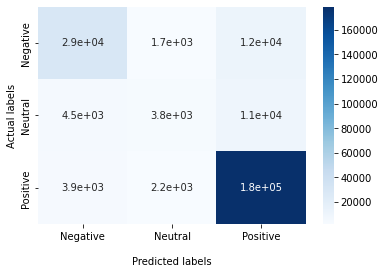

In [250]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted labels')
ax.set_ylabel('Actual labels');

ax.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral','Positive'])

plt.show()

In [251]:
cl=metrics.classification_report(test_y, y_pred)
print(cl)

              precision    recall  f1-score   support

          -1       0.78      0.68      0.73     43035
           0       0.49      0.20      0.28     18990
           1       0.89      0.97      0.93    184920

    accuracy                           0.86    246945
   macro avg       0.72      0.62      0.65    246945
weighted avg       0.84      0.86      0.84    246945



# **We can repeat the above last 8 cells for each chunk inorder to get the confusion matrix and classfication report for each of them**